#### Import packages

In [5]:
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd

#### Create datasets

In [7]:
randomState=4
np.random.seed(randomState)

values=100000
columns=20
rows = values//columns

X = np.random.standard_normal(values).reshape(rows,columns)
y = np.random.binomial(10,0.5,size=rows)

test_X = np.random.standard_normal(values).reshape(rows,columns)

#### knn-implementation

In [8]:
class knn():

    def __init__(self):
        
        self.name = 'KNN'
        
        pass
        
    def train(self, X, Y):
        
        self.X = X
        self.Y = Y
        
    def distance(self, X, new_observation):
        
        distance_vector = np.linalg.norm(X-new_observation,axis=1)
        
        return(distance_vector)
    
    def neighbors_n(self, distance_vector, k):
        
        nearest_neighbors = distance_vector.argsort()[:k]
        
        return(nearest_neighbors)
    
    def predict(self, newObservations, k):
        
        n_observartions = newObservations.shape[0]
        predictions = []
        
        for observartion_id in range(n_observartions):
            
            observation = newObservations[observartion_id]
            
            distance_vector = self.distance(self.X, observation)
            
            nearest_neighbors = self.neighbors_n(distance_vector, k)
            
            predictions += [ np.mean(self.Y[nearest_neighbors]) ]
        
        predictions = np.array(predictions)
        
        return(predictions)

#### Train & Run knn

In [9]:
model=knn()
model.train(X=X,Y=y)

predictions = model.predict(test_X,k=5)

predictions

array([4.6, 4.6, 4.8, ..., 6.6, 5.4, 5.8], shape=(5000,))

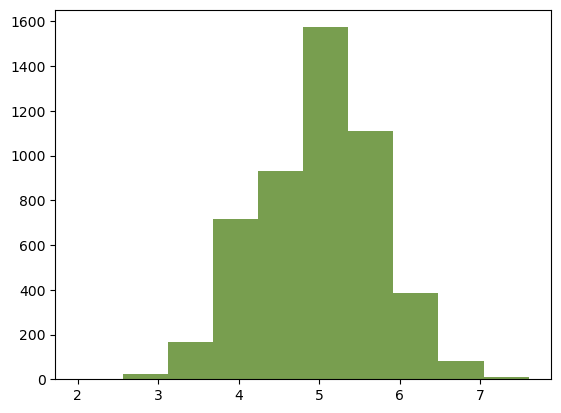

In [12]:
plt.hist(predictions, bins=10, alpha=0.5);
plt.show();